# Customer Segmentation

## Topic

## Objective

## Summary

## Importing libraries

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from datetime import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
import sidetable
sns.set(rc = {'figure.figsize':(15,8)})

# Business trend analysis

Data sets needed : 
- Orders data set
- Orders items data set
- Products data set

## Importing data

### Orders dataset

In [50]:
orders_df = pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Clients_Clustering\olist_orders_dataset.csv', sep =",")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [51]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


<AxesSubplot:>

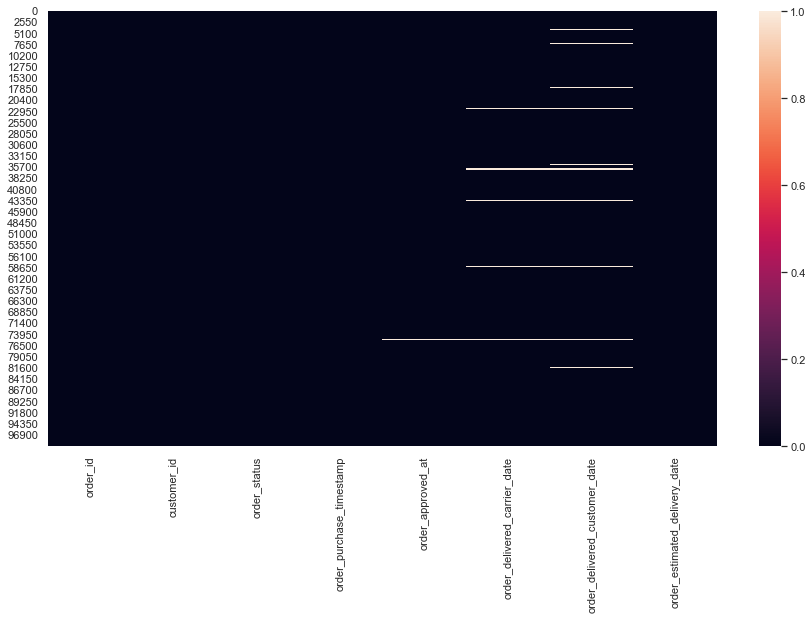

In [52]:
sns.heatmap(orders_df.isnull())

Missing values are not very importan here, the biggest one is about 3% from the time the order was delivred to the customer.

In [53]:
orders_df.describe().transpose()

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


In [54]:
orders_df = orders_df.ffill(axis = 1)

I chose to fill out the empty values using pandas ffil, wchich enables you to substitute a missing value with another one. In this case, I prefered to fill them with the value on their left (i.e the date and time at which the previous step of their order was recorded) as opposed to the time of the same step of the previous order in the row. 

In [58]:
def date_time(df, cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d').dt.date
date_time(orders_df,["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date",
                            "order_delivered_customer_date","order_estimated_delivery_date"])
orders_df.sort_values(by = 'order_purchase_timestamp', inplace = True)

In this part, I converted the dates and time columns into datetime format and dropped the time part, because we might combine sales by days later.Then sorted the dataframe because the time line in this case study is important as it reveals about the developement of the business. 